In [1]:
import numpy as np
from keras.applications import DenseNet121, VGG16
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize

In [2]:
base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [3]:
base_model_densenet.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']

In [4]:
base_model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

170498071/170498071 [==============================] - 4s 0us/step


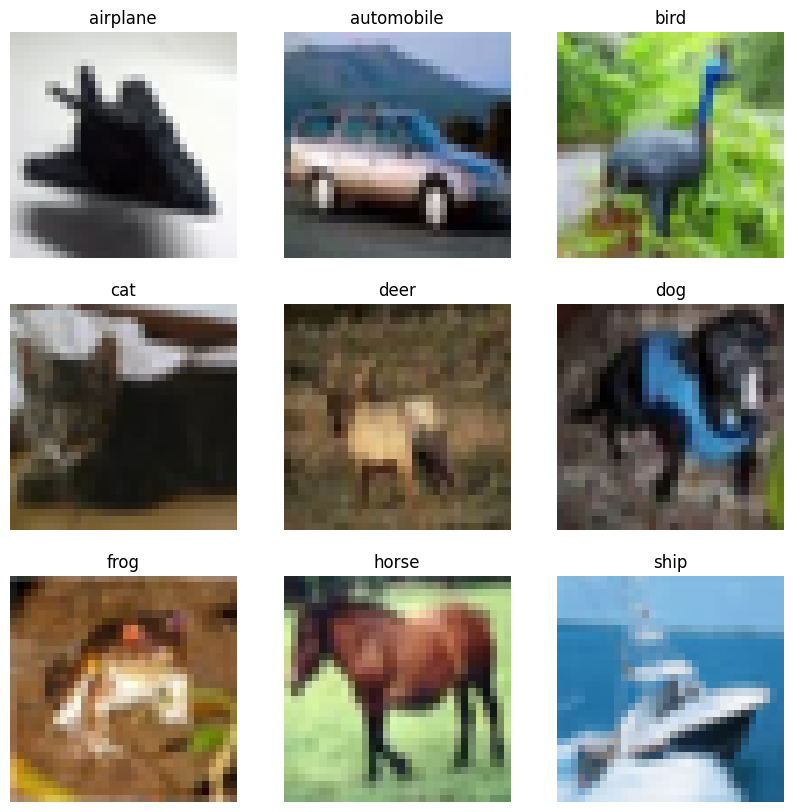

In [6]:
class_indices = [np.where(y_train == i)[0][0] for i in range(9)]
plt.figure(figsize=(10, 10))
for i, idx in enumerate(class_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[idx])
    plt.title(class_names[i])
    plt.axis('off')
plt.show()

In [7]:
def add_layer(base_model, num_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [8]:
model_densenet = add_layer(base_model_densenet, num_classes)
model_vgg = add_layer(base_model_vgg, num_classes)

In [9]:
from keras.applications.densenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator


num_classes = 10
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)


train_datagen = ImageDataGenerator(

)

test_datagen = ImageDataGenerator(

)


train_generator = train_datagen.flow(
    x=x_train, y=y_train_encoded,
    batch_size=64
)

test_generator = test_datagen.flow(
    x=x_test, y=y_test_encoded,
    batch_size=64
)

model_densenet = add_layer(base_model_densenet, num_classes=num_classes)

model_densenet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# train model
history = model_densenet.fit(
    train_generator,
    epochs=3,
    validation_data=test_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)

Epoch 1/3
782/782 [==============================] - 897s 1s/step - loss: 0.9511 - accuracy: 0.6773 - val_loss: 0.9125 - val_accuracy: 0.6915
Epoch 2/3
782/782 [==============================] - 845s 1s/step - loss: 0.7258 - accuracy: 0.7526 - val_loss: 1.4811 - val_accuracy: 0.5555
Epoch 3/3
782/782 [==============================] - 861s 1s/step - loss: 0.6485 - accuracy: 0.7770 - val_loss: 0.7399 - val_accuracy: 0.7488


In [10]:



num_classes = 10
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)


train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


train_generator = train_datagen.flow(
    x=x_train, y=y_train_encoded,
    batch_size=64
)

test_generator = test_datagen.flow(
    x=x_test, y=y_test_encoded,
    batch_size=64
)

model_densenet = add_layer(base_model_densenet, num_classes=num_classes)

model_densenet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# train model
history = model_densenet.fit(
    train_generator,
    epochs=3,
    validation_data=test_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)

Epoch 1/3
782/782 [==============================] - 885s 1s/step - loss: 0.6432 - accuracy: 0.7893 - val_loss: 0.8019 - val_accuracy: 0.7423
Epoch 2/3
782/782 [==============================] - 849s 1s/step - loss: 0.4562 - accuracy: 0.8457 - val_loss: 0.8304 - val_accuracy: 0.7601
Epoch 3/3
782/782 [==============================] - 853s 1s/step - loss: 0.3750 - accuracy: 0.8731 - val_loss: 0.5712 - val_accuracy: 0.8147


In [11]:

train_datagen = ImageDataGenerator(

)

test_datagen = ImageDataGenerator(

)


train_generator = train_datagen.flow(
    x=x_train, y=y_train_encoded,
    batch_size=64
)

test_generator = test_datagen.flow(
    x=x_test, y=y_test_encoded,
    batch_size=64
)

model_vgg = add_layer(base_model_vgg, num_classes=num_classes)

model_vgg.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# train model
history = model_densenet.fit(
    train_generator,
    epochs=3,
    validation_data=test_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)

Epoch 1/3
782/782 [==============================] - 836s 1s/step - loss: 0.3189 - accuracy: 0.8896 - val_loss: 0.5904 - val_accuracy: 0.8069
Epoch 2/3
782/782 [==============================] - 841s 1s/step - loss: 0.3194 - accuracy: 0.8930 - val_loss: 0.6330 - val_accuracy: 0.7977
Epoch 3/3
782/782 [==============================] - 850s 1s/step - loss: 0.2637 - accuracy: 0.9105 - val_loss: 0.6663 - val_accuracy: 0.7987


In [12]:

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


train_generator = train_datagen.flow(
    x=x_train, y=y_train_encoded,
    batch_size=64
)

test_generator = test_datagen.flow(
    x=x_test, y=y_test_encoded,
    batch_size=64
)

model_vgg = add_layer(base_model_vgg, num_classes=num_classes)

model_vgg.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# train model
history = model_densenet.fit(
    train_generator,
    epochs=3,
    validation_data=test_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)

Epoch 1/3
782/782 [==============================] - 826s 1s/step - loss: 0.1968 - accuracy: 0.9317 - val_loss: 0.6770 - val_accuracy: 0.7942
Epoch 2/3
782/782 [==============================] - 832s 1s/step - loss: 0.2690 - accuracy: 0.9098 - val_loss: 0.5675 - val_accuracy: 0.8309
Epoch 3/3
782/782 [==============================] - 830s 1s/step - loss: 0.1487 - accuracy: 0.9493 - val_loss: 0.6082 - val_accuracy: 0.8335
